In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
def distances_swarms(log_pos_xs, log_pos_ys, log_pos_zs, log_pos_xs_preys, log_pos_ys_preys, log_pos_zs_preys):

    # swarm position is the mean of all agents
    swarm_position_preds = np.mean(np.array([log_pos_xs, log_pos_ys, log_pos_zs]), axis=0)
    swarm_position_preys = np.mean(np.array([log_pos_xs_preys, log_pos_ys_preys, log_pos_zs_preys]), axis=0)

    # distances between swarms
    distances = np.linalg.norm(swarm_position_preds - swarm_position_preys, axis=1)

    return distances


def order_parameter(log_pos_h_xc, log_pos_h_yc, log_pos_h_zc):\
    # Calculate the order parameter for each predator at each time step
    num_predators, num_timesteps = log_pos_h_xc.T.shape

    order_parameters = np.zeros((num_predators, num_timesteps))
    N = len(log_pos_h_xc[1])
    for i in range(num_timesteps):
        sum_exp = np.sum(np.exp(1j * log_pos_h_xc[i] + 1j * log_pos_h_yc[i] + 1j * log_pos_h_zc[i]))
        order_parameters[:, i] = np.abs(sum_exp) / N

    return order_parameters


def mean_speed_predators(log_pos_xs, log_pos_ys, log_pos_zs):
    # speed of each predator
    time_steps, num_predators = log_pos_xs.shape # 4800, 10
    speed = np.zeros((time_steps, num_predators)) # 4800, 10

    for i in range(1, time_steps):
        dx = log_pos_xs[i] - log_pos_xs[i-1]
        dy = log_pos_ys[i] - log_pos_ys[i-1]
        dz = log_pos_zs[i] - log_pos_zs[i-1]
        speed[i] = np.sqrt(dx**2 + dy**2 + dz**2) # Euclidean distance

    mean_speed = np.mean(speed, axis=1) # mean speed at each time step
    return mean_speed




def compute_individual_distances(log_pos_xs, log_pos_ys, log_pos_zs, log_pos_xs_preys, log_pos_ys_preys, log_pos_zs_preys):
    # (4800, 10)
    num_timesteps = log_pos_xs.shape[0]
    num_predators = log_pos_xs.shape[1]
    num_preys = log_pos_xs_preys.shape[1]

    distances = np.zeros((num_predators, num_preys, num_timesteps))

    for t in range(num_timesteps):
        for i in range(num_predators):
            for j in range(num_preys):
                dx = log_pos_xs[t, i] - log_pos_xs_preys[t, j]
                dy = log_pos_ys[t, i] - log_pos_ys_preys[t, j]
                dz = log_pos_zs[t, i] - log_pos_zs_preys[t, j]
                distances[i, j, t] = np.sqrt(dx**2 + dy**2 + dz**2) # Euclidean distance

    return distances


def plot_results(distances, speed, order_parameters, individual_distances, title):
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    plt.suptitle(title)
    ax[0].plot(distances)
    ax[0].set_title('Distances between swarms')
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Distance')

    ax[1].plot(speed)
    ax[1].set_title('Mean speed')
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Speed')

    ax[2].plot(order_parameters.T)
    ax[2].set_title('Order parameter')
    ax[2].set_xlabel('Time')
    ax[2].set_ylabel('Order parameter')
    plt.show()

    cmap = plt.get_cmap('tab20c')
    plt.figure(figsize=(10,5))
    sns.heatmap(individual_distances[:, :, -1], annot=True, fmt=".2f", cmap=cmap)
    plt.title('Distances between predators and preys at the last time step all sensing predators')
    plt.xlabel('Preys')
    plt.ylabel('Predators')
    plt.show()



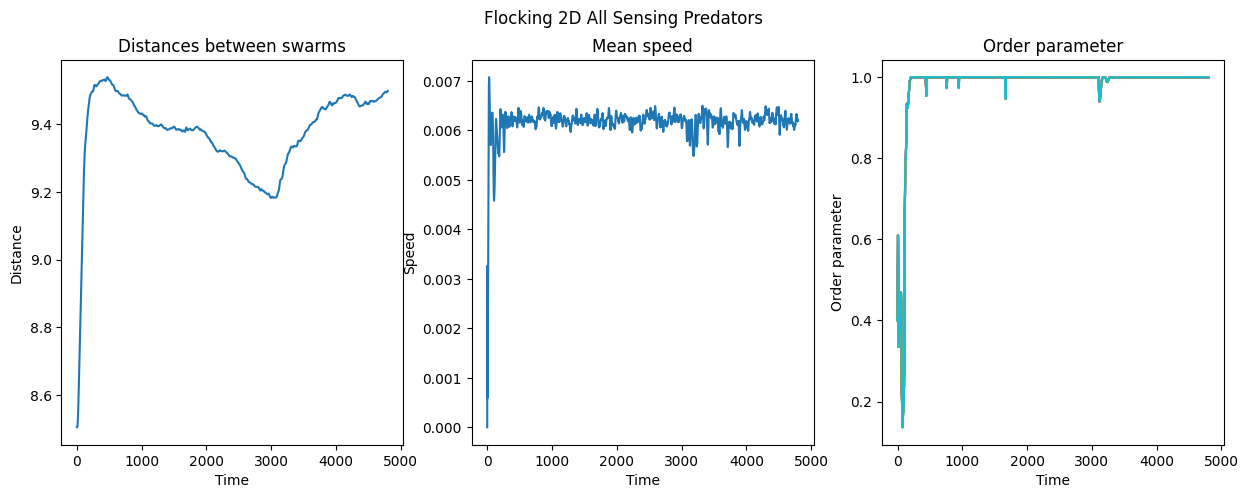

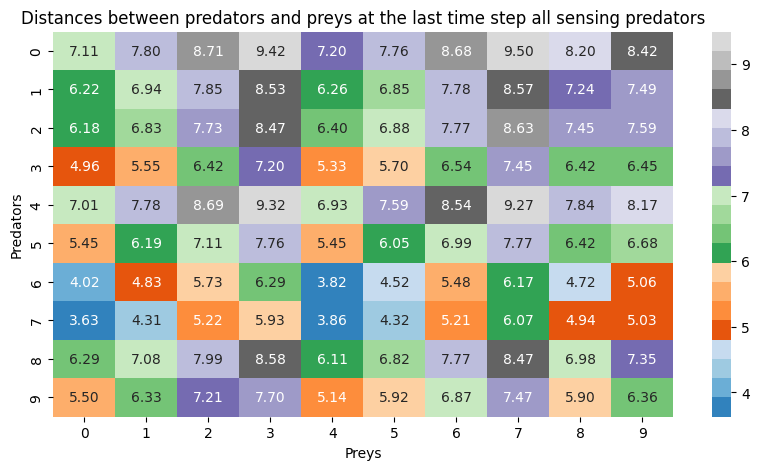

In [106]:
path1 = f'data/flocking3D-False_percNoSensor-0%_25-05-2024_21-24/'

# Load data
log_pos_xs  = np.load(path1 + 'log_pos_xs_.npy')
log_pos_ys  = np.load(path1 + 'log_pos_ys_.npy')
log_pos_zs  = np.load(path1 + 'log_pos_zs_.npy')
log_pos_hxs = np.load(path1 + 'log_pos_hxs_.npy')
log_pos_hys = np.load(path1 + 'log_pos_hys_.npy')
log_pos_hzs = np.load(path1 + 'log_pos_hzs_.npy')

log_pos_xs_preys   = np.load(path1 + 'log_pos_xs_preys_.npy')
log_pos_ys_preys   = np.load(path1 + 'log_pos_ys_preys_.npy')
log_pos_zs_preys   = np.load(path1 + 'log_pos_zs_preys_.npy')
log_pos_h_xc_preys = np.load(path1 + 'log_pos_h_xc_preys_.npy')
log_pos_h_yc_preys = np.load(path1 + 'log_pos_h_yc_preys_.npy')
log_pos_h_zc_preys = np.load(path1 + 'log_pos_h_zc_preys_.npy')




distances = distances_swarms(log_pos_xs, log_pos_ys, log_pos_zs, log_pos_xs_preys, log_pos_ys_preys, log_pos_zs_preys)
speed = mean_speed_predators(log_pos_xs, log_pos_ys, log_pos_zs)
order_parameters = order_parameter(log_pos_hxs, log_pos_hys, log_pos_hzs)
individual_distances = compute_individual_distances(log_pos_xs, log_pos_ys, log_pos_zs, log_pos_xs_preys, log_pos_ys_preys, log_pos_zs_preys)

plot_results(distances, speed, order_parameters, individual_distances, title='Flocking 2D All Sensing Predators')

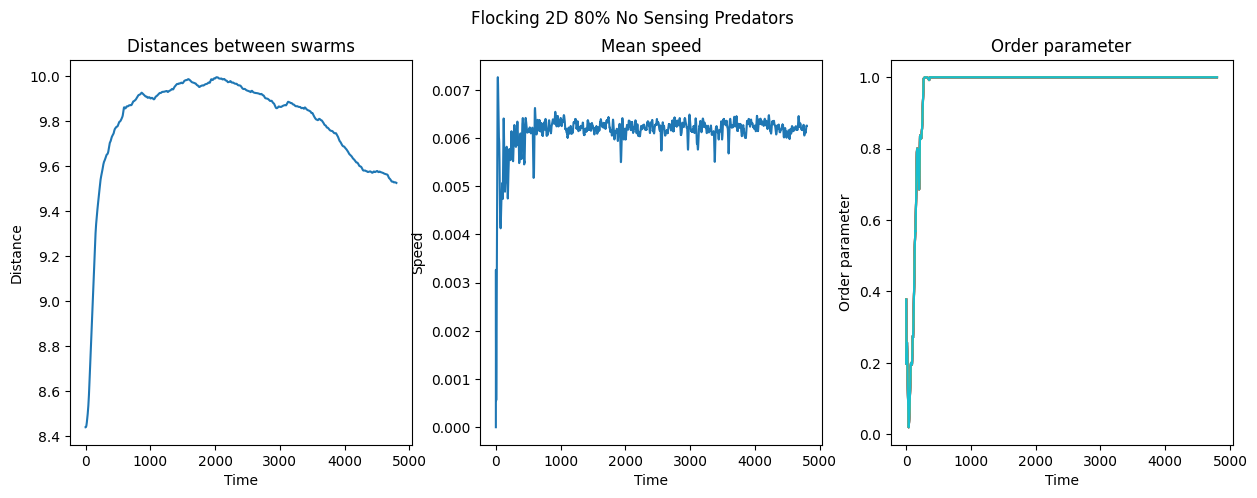

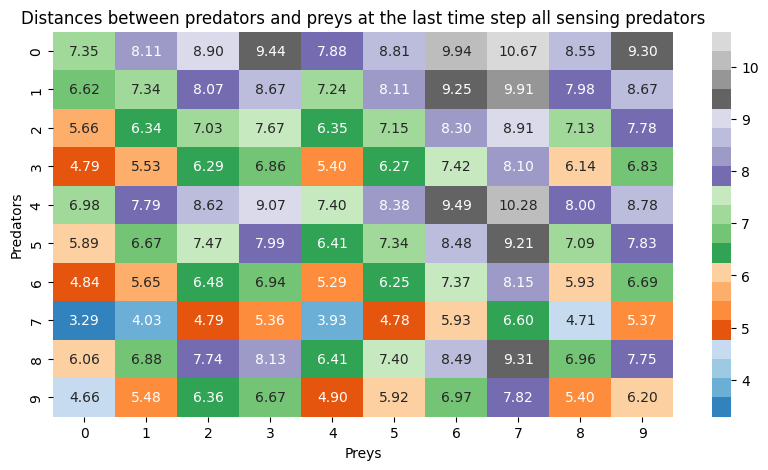

In [107]:
path1 = f'data/flocking3D-False_percNoSensor-80%_25-05-2024_21-25/'

# Load data
log_pos_xs  = np.load(path1 + 'log_pos_xs_.npy')
log_pos_ys  = np.load(path1 + 'log_pos_ys_.npy')
log_pos_zs  = np.load(path1 + 'log_pos_zs_.npy')
log_pos_hxs = np.load(path1 + 'log_pos_hxs_.npy')
log_pos_hys = np.load(path1 + 'log_pos_hys_.npy')
log_pos_hzs = np.load(path1 + 'log_pos_hzs_.npy')

log_pos_xs_preys   = np.load(path1 + 'log_pos_xs_preys_.npy')
log_pos_ys_preys   = np.load(path1 + 'log_pos_ys_preys_.npy')
log_pos_zs_preys   = np.load(path1 + 'log_pos_zs_preys_.npy')
log_pos_h_xc_preys = np.load(path1 + 'log_pos_h_xc_preys_.npy')
log_pos_h_yc_preys = np.load(path1 + 'log_pos_h_yc_preys_.npy')
log_pos_h_zc_preys = np.load(path1 + 'log_pos_h_zc_preys_.npy')




distances = distances_swarms(log_pos_xs, log_pos_ys, log_pos_zs, log_pos_xs_preys, log_pos_ys_preys, log_pos_zs_preys)
speed = mean_speed_predators(log_pos_xs, log_pos_ys, log_pos_zs)
order_parameters = order_parameter(log_pos_hxs, log_pos_hys, log_pos_hzs)
individual_distances = compute_individual_distances(log_pos_xs, log_pos_ys, log_pos_zs, log_pos_xs_preys, log_pos_ys_preys, log_pos_zs_preys)

plot_results(distances, speed, order_parameters, individual_distances, title='Flocking 2D 80% No Sensing Predators')

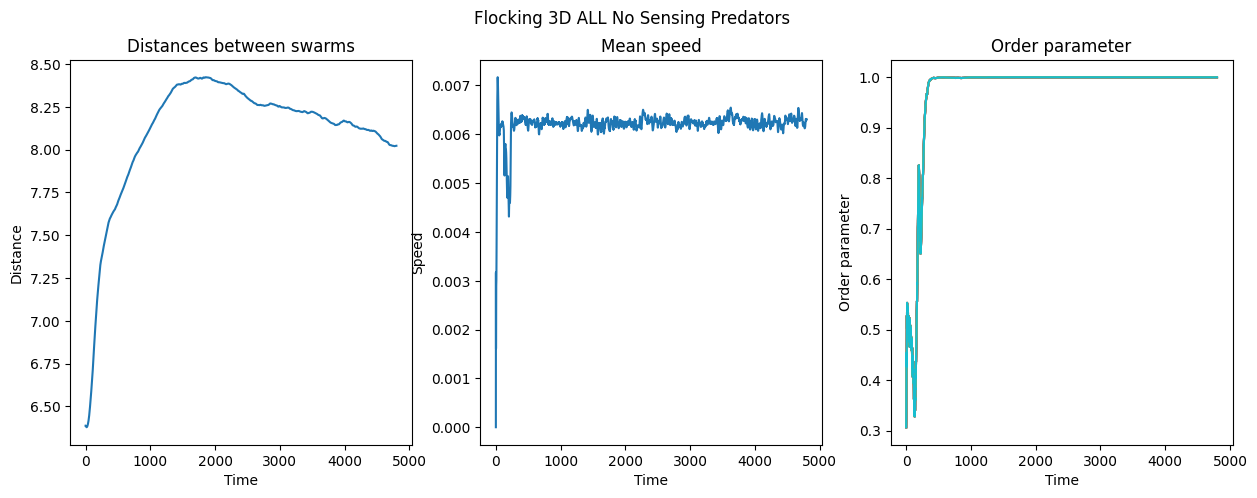

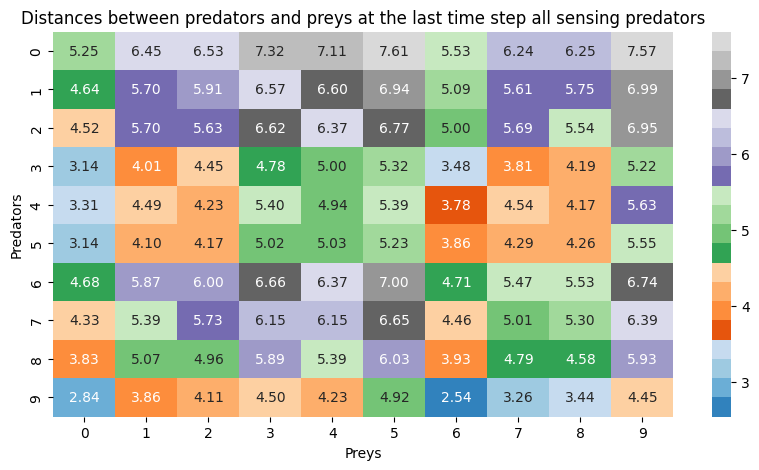

In [108]:
path1 = f'data/flocking3D-True_percNoSensor-0%_25-05-2024_21-24/'

# Load data
log_pos_xs  = np.load(path1 + 'log_pos_xs_.npy')
log_pos_ys  = np.load(path1 + 'log_pos_ys_.npy')
log_pos_zs  = np.load(path1 + 'log_pos_zs_.npy')
log_pos_hxs = np.load(path1 + 'log_pos_hxs_.npy')
log_pos_hys = np.load(path1 + 'log_pos_hys_.npy')
log_pos_hzs = np.load(path1 + 'log_pos_hzs_.npy')

log_pos_xs_preys   = np.load(path1 + 'log_pos_xs_preys_.npy')
log_pos_ys_preys   = np.load(path1 + 'log_pos_ys_preys_.npy')
log_pos_zs_preys   = np.load(path1 + 'log_pos_zs_preys_.npy')
log_pos_h_xc_preys = np.load(path1 + 'log_pos_h_xc_preys_.npy')
log_pos_h_yc_preys = np.load(path1 + 'log_pos_h_yc_preys_.npy')
log_pos_h_zc_preys = np.load(path1 + 'log_pos_h_zc_preys_.npy')




distances = distances_swarms(log_pos_xs, log_pos_ys, log_pos_zs, log_pos_xs_preys, log_pos_ys_preys, log_pos_zs_preys)
speed = mean_speed_predators(log_pos_xs, log_pos_ys, log_pos_zs)
order_parameters = order_parameter(log_pos_hxs, log_pos_hys, log_pos_hzs)
individual_distances = compute_individual_distances(log_pos_xs, log_pos_ys, log_pos_zs, log_pos_xs_preys, log_pos_ys_preys, log_pos_zs_preys)

plot_results(distances, speed, order_parameters, individual_distances, title='Flocking 3D ALL No Sensing Predators')

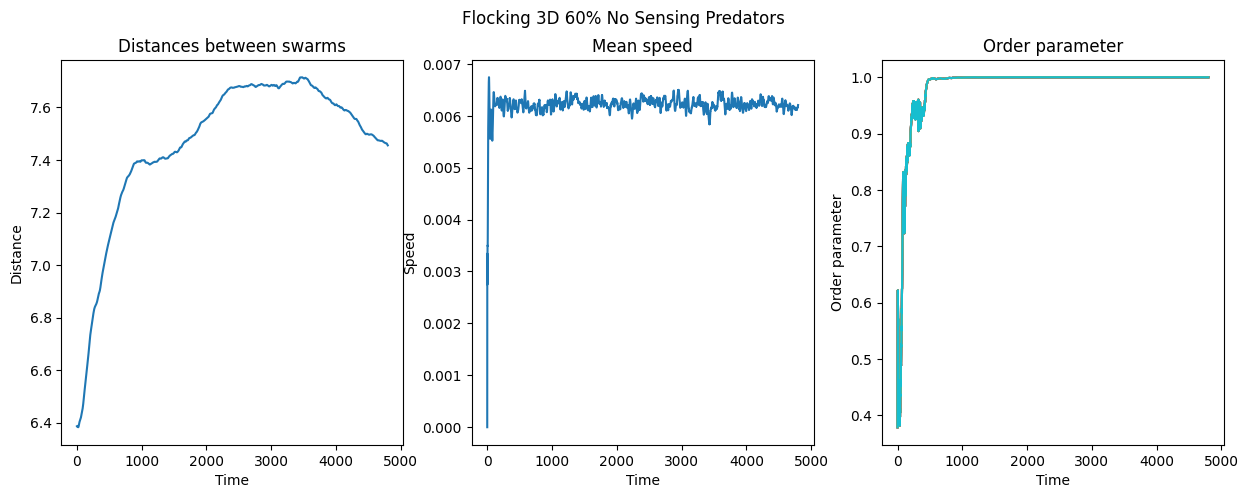

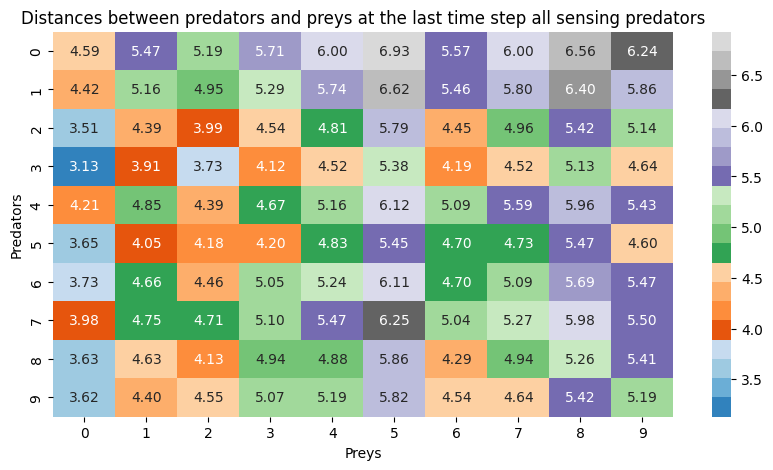

In [109]:
path1 = f'data/flocking3D-True_percNoSensor-60%_25-05-2024_21-23/'

# Load data
log_pos_xs  = np.load(path1 + 'log_pos_xs_.npy')
log_pos_ys  = np.load(path1 + 'log_pos_ys_.npy')
log_pos_zs  = np.load(path1 + 'log_pos_zs_.npy')
log_pos_hxs = np.load(path1 + 'log_pos_hxs_.npy')
log_pos_hys = np.load(path1 + 'log_pos_hys_.npy')
log_pos_hzs = np.load(path1 + 'log_pos_hzs_.npy')

log_pos_xs_preys   = np.load(path1 + 'log_pos_xs_preys_.npy')
log_pos_ys_preys   = np.load(path1 + 'log_pos_ys_preys_.npy')
log_pos_zs_preys   = np.load(path1 + 'log_pos_zs_preys_.npy')
log_pos_h_xc_preys = np.load(path1 + 'log_pos_h_xc_preys_.npy')
log_pos_h_yc_preys = np.load(path1 + 'log_pos_h_yc_preys_.npy')
log_pos_h_zc_preys = np.load(path1 + 'log_pos_h_zc_preys_.npy')




distances = distances_swarms(log_pos_xs, log_pos_ys, log_pos_zs, log_pos_xs_preys, log_pos_ys_preys, log_pos_zs_preys)
speed = mean_speed_predators(log_pos_xs, log_pos_ys, log_pos_zs)
order_parameters = order_parameter(log_pos_hxs, log_pos_hys, log_pos_hzs)
individual_distances = compute_individual_distances(log_pos_xs, log_pos_ys, log_pos_zs, log_pos_xs_preys, log_pos_ys_preys, log_pos_zs_preys)

plot_results(distances, speed, order_parameters, individual_distances, title='Flocking 3D 60% No Sensing Predators')

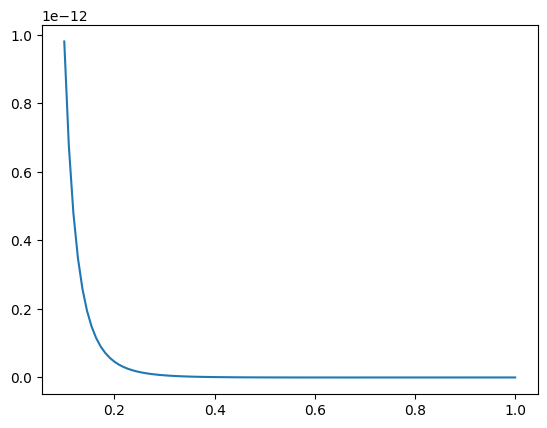

In [20]:

angle = [np.pi, 0, np.pi / 2, -np.pi / 2]
angle = np.array(angle)
k_rep = 2.0
L0 = 0.5
pb_i = np.array(np.cos(-np.pi/2))
dist = np.linspace(0.1, 1, 100)
rb_i = k_rep * ((1.0 / dist) - (1.0 / L0)) * (pb_i / (dist**3))

plt.plot(dist, rb_i)





In [6]:

pos_xs = np.array(np.linspace(0, 10, 100))
print(pos_xs)

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8